In [1]:
from matplotlib.pyplot import style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
style.use("ggplot")

# Base de données de l'ATP

## Nettoyage de la base de données

In [2]:
df=pd.read_csv("/Documents/Personnel/Programmation/Datasets/ATP.csv")

In [3]:
df.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN


In [4]:
df.describe()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_ht,winner_id,winner_rank,winner_rank_points,winner_seed
count,169690.000000,1232.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,...,83415.000000,83415.000000,83415.000000,83415.000000,167929.000000,150884.000000,169690.000000,149773.000000,94291.000000,65295.000000
mean,3.446072,75.022727,47.705149,31.683690,15.029119,12.159995,4.779776,8.751555,4.808044,3.509081,...,5.174381,3.528790,2.743859,77.906887,25.612639,184.277200,102362.973540,81.409827,1342.313296,6.209495
std,0.832567,43.500071,19.359849,14.437267,7.266522,4.114587,4.625035,4.123616,3.271050,2.623945,...,4.058311,3.081844,2.368677,29.532338,3.943494,6.632803,3958.369064,123.875156,1672.646568,5.401583
min,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.360000,160.000000,100002.000000,1.000000,1.000000,1.000000
25%,3.000000,64.000000,34.000000,21.000000,10.000000,9.000000,2.000000,6.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,56.000000,22.760000,180.000000,100445.000000,18.000000,496.000000,2.000000
50%,3.000000,64.000000,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000,4.000000,3.000000,...,4.000000,3.000000,2.000000,73.000000,25.250000,185.000000,101611.000000,48.000000,835.000000,5.000000
75%,3.000000,128.000000,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000,7.000000,5.000000,...,7.000000,5.000000,4.000000,94.000000,28.130000,188.000000,103694.000000,96.000000,1508.000000,8.000000
max,5.000000,128.000000,328.000000,284.000000,101.000000,91.000000,103.000000,35.000000,28.000000,26.000000,...,34.000000,24.000000,23.000000,491.000000,58.718686,208.000000,208996.000000,2101.000000,16950.000000,35.000000


Commençons par observer s'il y a des valeurs manquantes dans la base de données

In [5]:
df.isnull().sum()

best_of                    0
draw_size             168458
l_1stIn                86275
l_1stWon               86275
l_2ndWon               86275
l_SvGms                86275
l_ace                  86275
l_bpFaced              86275
l_bpSaved              86275
l_df                   86275
l_svpt                 86275
loser_age               4990
loser_entry           144351
loser_hand                85
loser_ht               30638
loser_id                   0
loser_ioc                  0
loser_name                 0
loser_rank             23781
loser_rank_points      76665
loser_seed            136837
match_num                  0
minutes                87587
round                      0
score                    176
surface                 2539
tourney_date               0
tourney_id                 0
tourney_level              0
tourney_name               0
w_1stIn                86275
w_1stWon               86275
w_2ndWon               86275
w_SvGms                86275
w_ace         

On remarque donc qu'il semble manquer plusieurs données dans l'échantillon. Cependant, dans l'analyse qui suit, nous allons nous intéresser à aux années 1990 et subséquentes. Trouvons l'index où Roger Federer a joué son premier match et créons la nouvelle base de données.

In [6]:
rf_index=df[(df["winner_name"]=="Pete Sampras") | (df["loser_name"]=="Pete Sampras")].index[0]
df_1990=df.iloc[rf_index:]
df_1990.shape

(103351, 49)

Observons maintenant les valeurs manquantes dans cette base de données tronquées.

In [7]:
df_1990.isnull().sum()

best_of                    0
draw_size             103351
l_1stIn                19936
l_1stWon               19936
l_2ndWon               19936
l_SvGms                19936
l_ace                  19936
l_bpFaced              19936
l_bpSaved              19936
l_df                   19936
l_svpt                 19936
loser_age                389
loser_entry            83171
loser_hand                43
loser_ht                9288
loser_id                   0
loser_ioc                  0
loser_name                 0
loser_rank              2627
loser_rank_points      10326
loser_seed             80772
match_num                  0
minutes                21248
round                      0
score                      2
surface                  118
tourney_date               0
tourney_id                 0
tourney_level              0
tourney_name               0
w_1stIn                19936
w_1stWon               19936
w_2ndWon               19936
w_SvGms                19936
w_ace         

On voit donc qu'il manque encore des données, mais dans un ordre d'échelle beaucoup moins important qu'auparavant. Pour le moment, nous garderons la base de données tel quelle. Nous allons maintenant ôter les colonnes non utiles en plus de transférer les données pertinentes en format numérique.

In [8]:
cols=["tourney_id","winner_id","winner_entry","loser_id","loser_entry"]
df_1990.drop(cols,axis=1,inplace=True)


for i in df_1990.columns:
    print(i,df_1990[i].dtype)

best_of int64
draw_size float64
l_1stIn float64
l_1stWon float64
l_2ndWon float64
l_SvGms float64
l_ace float64
l_bpFaced float64
l_bpSaved float64
l_df float64
l_svpt float64
loser_age float64
loser_hand object
loser_ht float64
loser_ioc object
loser_name object
loser_rank float64
loser_rank_points float64
loser_seed float64
match_num int64
minutes float64
round object
score object
surface object
tourney_date int64
tourney_level object
tourney_name object
w_1stIn float64
w_1stWon float64
w_2ndWon float64
w_SvGms float64
w_ace float64
w_bpFaced float64
w_bpSaved float64
w_df float64
w_svpt float64
winner_age float64
winner_hand object
winner_ht float64
winner_ioc object
winner_name object
winner_rank float64
winner_rank_points float64
winner_seed float64


À partir de l'output ci-dessus, tous les colonnes semblent être dans le bon format. Nous allons maintenant séparer la colonne tourney_date en trois, soit l'année, le mois et le jour. 

In [9]:
df_1990["tourney_date"]=df_1990["tourney_date"].astype(str)

df_1990["tourney_date"]=pd.to_datetime(df_1990["tourney_date"], format="%Y%m%d")
df_1990["date"]=df_1990["tourney_date"].astype(str)
new=df_1990["date"].str.split("-",n=3,expand=True)
df_1990["year"]=new[0]
df_1990["month"]=new[1]
df_1990["day"]=new[2]

df_1990["year"]=df_1990["year"].astype(float)
df_1990["month"]=df_1990["month"].astype(float)
df_1990["day"]=df_1990["day"].astype(float)

df_1990=df_1990.reset_index(drop=True)

In [10]:
df_1990.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_ht,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed,date,year,month,day
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178.0,USA,Sammy Giammalva Jr,105.0,NaN,NaN,1988-02-22,1988.0,2.0,22.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,175.0,SWE,Peter Lindgren,184.0,NaN,NaN,1988-02-22,1988.0,2.0,22.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,193.0,USA,Jim Grabb,46.0,NaN,NaN,1988-02-22,1988.0,2.0,22.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,185.0,USA,Ken Flach,115.0,NaN,NaN,1988-02-22,1988.0,2.0,22.0
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.0,RSA,Gary Muller,78.0,NaN,NaN,1988-02-22,1988.0,2.0,22.0


## Federer, Nadal, Djokovic, qui est le meilleur?

### Classement

En premier lieu, examions l'évolution du classement de ces trois joueurs au fil des années. Nous allons débuter l'analyse en 2000. Nous utiliserons le classement en fin d'année.

In [11]:
df_fed = df_1990[(df_1990["winner_name"]=="Roger Federer") | (df_1990["loser_name"]=="Roger Federer")]
df_fed=df_fed.iloc[255:]
df_fed.reset_index(drop=True, inplace=True)

fed_ranking=[]
for i in range(0,df_fed.shape[0]):
    if df_fed["winner_name"][i]=="Roger Federer":
        fed_ranking.append(df_fed["winner_rank"][i])
    else:
        fed_ranking.append(df_fed["loser_rank"][i])
        
df_fed["ranking"]=fed_ranking

In [12]:
df_nadal = df_1990[(df_1990["winner_name"]=="Rafael Nadal") | (df_1990["loser_name"]=="Rafael Nadal")]
df_nadal=df_nadal[df_nadal["year"]>=2005] #on trie à partir de 2003 comme pour federer 
df_nadal.reset_index(drop=True, inplace=True)

nadal_ranking=[]
for i in range(0,df_nadal.shape[0]):
    if df_nadal["winner_name"][i]=="Rafael Nadal":
        nadal_ranking.append(df_nadal["winner_rank"][i])
    else:
        nadal_ranking.append(df_nadal["loser_rank"][i])
        
df_nadal["ranking"]=nadal_ranking

In [13]:
df_djoko = df_1990[(df_1990["winner_name"]=="Novak Djokovic") | (df_1990["loser_name"]=="Novak Djokovic")]
df_djoko=df_djoko[df_djoko["year"]>=2005] #on trie à partir de 2003 comme pour federer 
df_djoko.reset_index(drop=True, inplace=True)

djoko_ranking=[]
for i in range(0,df_djoko.shape[0]):
    if df_djoko["winner_name"][i]=="Novak Djokovic":
        djoko_ranking.append(df_djoko["winner_rank"][i])
    else:
        djoko_ranking.append(df_djoko["loser_rank"][i])
        
df_djoko["ranking"]=djoko_ranking

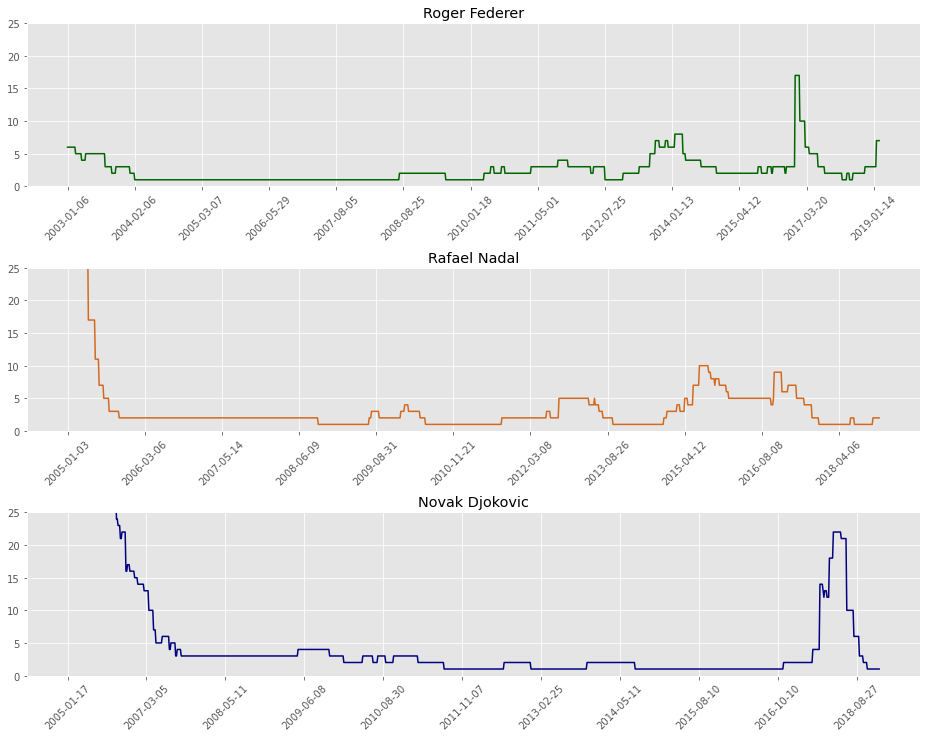

In [14]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
plt.plot(range(df_fed.shape[0]),df_fed["ranking"],color="darkgreen")
plt.xticks(range(0,df_fed.shape[0],100),df_fed['date'].loc[::100],rotation=45)
plt.ylim(0,25)
plt.title("Roger Federer")

plt.subplot(3,1,2)
plt.plot(range(df_nadal.shape[0]),df_nadal["ranking"],color="chocolate")
plt.xticks(range(0,df_nadal.shape[0],100),df_nadal['date'].loc[::100],rotation=45)
plt.ylim(0,25)
plt.title("Rafael Nadal")

plt.subplot(3,1,3)
plt.plot(range(df_djoko.shape[0]),df_djoko["ranking"],color="navy")
plt.xticks(range(0,df_djoko.shape[0],100),df_djoko['date'].loc[::100],rotation=45)
plt.ylim(0,25)
plt.title("Novak Djokovic")

plt.subplots_adjust(hspace = 0.5)



### Meilleurs saisons

On cherche maintenant à déterminer quel joueur à eux la meilleur saison à partir de 2003. 

In [15]:
df_fed["win"]=0
df_fed["win"][df_fed["winner_name"]=="Roger Federer"]=1
fed_wins=df_fed.groupby("year",as_index=False).agg({"win": [sum, "count"]})
fed_wins["per"]=fed_wins["win"]["sum"]/fed_wins["win"]["count"]

df_nadal["win"]=0
df_nadal["win"][df_nadal["winner_name"]=="Rafael Nadal"]=1
nadal_wins=df_nadal.groupby("year",as_index=False).agg({"win": [sum, "count"]})
nadal_wins["per"]=nadal_wins["win"]["sum"]/nadal_wins["win"]["count"]

df_djoko["win"]=0
df_djoko["win"][df_djoko["winner_name"]=="Novak Djokovic"]=1
djoko_wins=df_djoko.groupby("year",as_index=False).agg({"win": [sum, "count"]})
djoko_wins["per"]=djoko_wins["win"]["sum"]/djoko_wins["win"]["count"]

wins = [fed_wins, nadal_wins, djoko_wins]

#ôtons l'année 2019
fed_wins=fed_wins[fed_wins["year"]!=2019]
nadal_wins=nadal_wins[nadal_wins["year"]!=2019]
djoko_wins=djoko_wins[djoko_wins["year"]!=2019]

In [16]:
(ggplot(fed_wins, aes(x='year', y='per')) +
        geom_boxplot()
)

NameError: name 'ggplot' is not defined

In [ ]:
(ggplot(nadal_wins, aes(x='year', y='per')) +
        geom_bar(stat="identity", fill="chocolate")
)

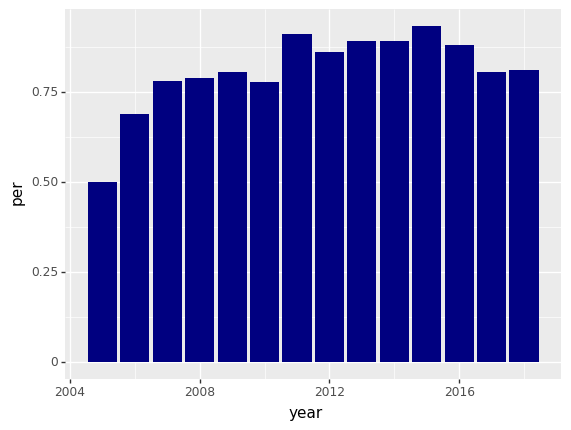

<ggplot: (296038520)>

In [18]:
(ggplot(djoko_wins, aes(x='year', y='per')) +
        geom_bar(stat="identity", fill="navy")
)

In [17]:
print(fed_wins.sort_values(by="per",ascending=False)[0:5],"\n")
print(nadal_wins.sort_values(by="per",ascending=False)[0:5],"\n")
print(djoko_wins.sort_values(by="per",ascending=False)[0:5],"\n")

      year win             per
           sum count          
2   2005.0  81    85  0.952941
3   2006.0  92    97  0.948454
1   2004.0  75    81  0.925926
14  2017.0  53    58  0.913793
4   2007.0  69    78  0.884615 

      year win             per
           sum count          
8   2013.0  81    88  0.920455
13  2018.0  45    49  0.918367
0   2005.0  79    89  0.887640
3   2008.0  78    88  0.886364
5   2010.0  71    81  0.876543 

      year win             per
           sum count          
10  2015.0  83    89  0.932584
6   2011.0  72    79  0.911392
8   2013.0  74    83  0.891566
9   2014.0  65    73  0.890411
11  2016.0  66    75  0.880000 



Dans l'ensemble, les cinq meilleurs saisons sont: Federer en 2005, Federer en 2006, Djokovic en 2015, Federer en 2004 et Nadal en 2013.

### Conversion des balles de bris

Lequel des joueurs est meilleur sous pression? Comment se comparent-ils au reste des joueurs de l'ATP?

In [18]:
df_fed

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_name,winner_rank,winner_rank_points,winner_seed,date,year,month,day,ranking,win
0,3,NaN,42.0,26.0,7.0,9.0,3.0,8.0,4.0,5.0,...,Franco Squillari,81.0,484.0,NaN,2003-01-06,2003.0,1.0,6.0,6.0,0
1,5,NaN,67.0,47.0,29.0,17.0,3.0,17.0,11.0,2.0,...,Roger Federer,6.0,2475.0,6.0,2003-01-13,2003.0,1.0,13.0,6.0,1
2,5,NaN,46.0,21.0,21.0,12.0,1.0,10.0,3.0,6.0,...,Roger Federer,6.0,2475.0,6.0,2003-01-13,2003.0,1.0,13.0,6.0,1
3,5,NaN,54.0,35.0,16.0,13.0,4.0,10.0,5.0,6.0,...,Roger Federer,6.0,2475.0,6.0,2003-01-13,2003.0,1.0,13.0,6.0,1
4,5,NaN,77.0,58.0,26.0,21.0,9.0,17.0,9.0,9.0,...,David Nalbandian,12.0,1740.0,10.0,2003-01-13,2003.0,1.0,13.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,3,NaN,50.0,31.0,22.0,13.0,1.0,8.0,4.0,4.0,...,Roger Federer,7.0,4100.0,2.0,2019-02-25,2019.0,2.0,25.0,7.0,1
1205,3,NaN,46.0,38.0,11.0,13.0,3.0,4.0,2.0,4.0,...,Roger Federer,7.0,4100.0,2.0,2019-02-25,2019.0,2.0,25.0,7.0,1
1206,3,NaN,40.0,28.0,23.0,11.0,2.0,7.0,5.0,0.0,...,Roger Federer,7.0,4100.0,2.0,2019-02-25,2019.0,2.0,25.0,7.0,1
1207,3,NaN,37.0,20.0,9.0,8.0,1.0,9.0,5.0,1.0,...,Roger Federer,7.0,4100.0,2.0,2019-02-25,2019.0,2.0,25.0,7.0,1


In [19]:
df_fed["bp_conv"]=0

df_fed["bp_conv"][df_fed["winner_name"]=="Roger Federer"]=1-(df_fed["l_bpSaved"]/df_fed["l_bpFaced"])
df_fed["bp_conv"][df_fed["loser_name"]=="Roger Federer"]=1-(df_fed["w_bpSaved"]/df_fed["w_bpFaced"])

print("De la saison 2003 à 2019 (exclusivement), Federer a converti", round(np.mean(df_fed["bp_conv"]),4)*100,"% de ses balles de bris")

df_nadal["bp_conv"]=0
df_nadal["bp_conv"][df_nadal["winner_name"]=="Rafael Nadal"]=1-(df_nadal["l_bpSaved"]/df_nadal["l_bpFaced"])
df_nadal["bp_conv"][df_nadal["loser_name"]=="Rafael Nadal"]=1-(df_nadal["w_bpSaved"]/df_nadal["w_bpFaced"])

print("De la saison 2005 à 2019 (exclusivement), Nadal a converti", round(np.mean(df_nadal["bp_conv"]),4)*100,"% de ses balles de bris")

df_djoko["bp_conv"]=0
df_djoko["bp_conv"][df_djoko["winner_name"]=="Novak Djokovic"]=1-(df_djoko["l_bpSaved"]/df_djoko["l_bpFaced"])
df_djoko["bp_conv"][df_djoko["loser_name"]=="Novak Djokovic"]=1-(df_djoko["w_bpSaved"]/df_djoko["w_bpFaced"])

print("De la saison 2005 à 2019 (exclusivement), Djokovic a converti", round(np.mean(df_djoko["bp_conv"]),4)*100,"% de ses balles de bris")

De la saison 2003 à 2019 (exclusivement), Federer a converti 45.16 % de ses balles de bris
De la saison 2005 à 2019 (exclusivement), Nadal a converti 48.13 % de ses balles de bris
De la saison 2005 à 2019 (exclusivement), Djokovic a converti 47.77 % de ses balles de bris


À priori, il ne semble pas y avoir une grande différence entre les trois. Toutefois, on note que Federer était déjà bien installé en 2003 au classement alors que les deux autres ne faisaient toujours pas partie de l'élite mondiale en 2005. Cela peut donc avoir biaisé les résultats. Regardons maintenant ce qu'il en ait par saison.

In [25]:
fed_bp=df_fed.groupby("year",as_index=False).agg({"bp_conv": np.mean})
nadal_bp=df_nadal.groupby("year",as_index=False).agg({"bp_conv": np.mean})
djoko_bp=df_djoko.groupby("year",as_index=False).agg({"bp_conv": np.mean})

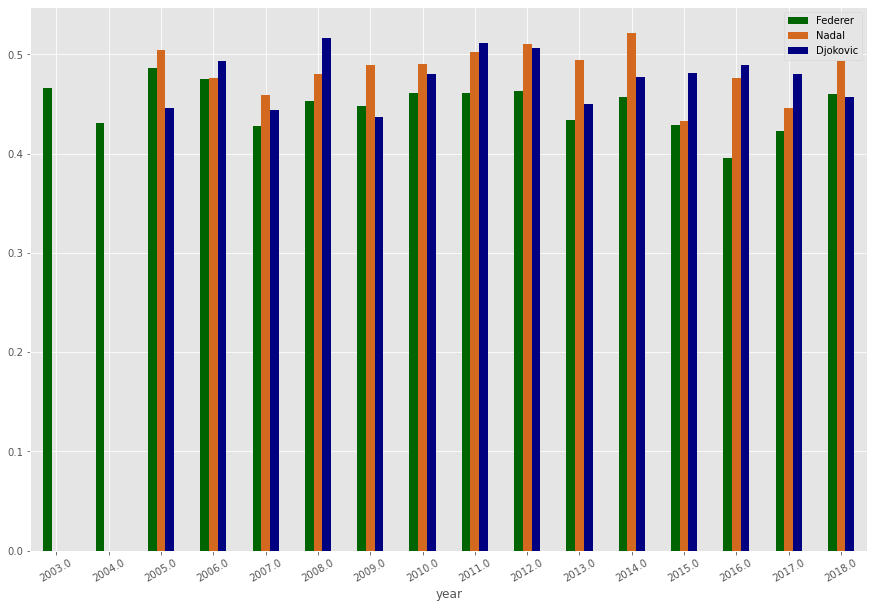

In [26]:
x=[nadal_bp,djoko_bp]
df_bp=fed_bp
for i in x:
    df_bp=df_bp.merge(i,on="year",how="left")

df_bp=df_bp[df_bp["year"]!=2019]
df_bp.plot(kind = 'bar', color = ['darkgreen','chocolate','navy'], figsize = (15,10), x = 'year', rot = 30)
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

On observe donc que Nadal et Djokovic sont clairement meilleurs dans cet aspect du jeux. Regardons maintenant comment ils se comportent en comparaison avec les autres joueurs de l'ATP. Nous allons comparer les joueurs depuis l'année 1990.

In [28]:
df_2005=df_1990[df_1990["year"]>=1990]
df_2005.reset_index(inplace=True,drop=True)

In [30]:
df_2005["l_bpconv"]=1-(df_2005["w_bpSaved"]/df_2005["w_bpFaced"])
df_2005["w_bpconv"]=1-(df_2005["l_bpSaved"]/df_2005["l_bpFaced"])

player_dic={}
for i in df_2005["winner_name"].unique():
    indexes=df_2005[df_2005["winner_name"]==i].index
    dataframe=df_2005.iloc[indexes]
    avg1= np.mean(dataframe["w_bpconv"])
    weigth_1=dataframe.shape[0]
    indexes=df_2005[df_2005["loser_name"]==i].index
    dataframe=df_2005.iloc[indexes]
    avg2= np.mean(dataframe["l_bpconv"])
    weigth_2=dataframe.shape[0]
    ratio=weigth_1/(weigth_1+weigth_2)
    
    player_dic[i]=[(ratio*avg1 + (1-ratio)*avg2), weigth_1,weigth_2]
    
df_ratio=pd.DataFrame.from_dict(player_dic, orient='index')
df_ratio.rename(columns={0: "conv_perc", 1:"wins", 2:"loses"}, inplace=True)
df_ratio.sort_values(by="conv_perc",inplace=True,ascending=False)
df_ratio=df_ratio.dropna()
df_ratio=df_ratio[df_ratio["wins"]+df_ratio["loses"]>=100]
df_ratio.reset_index(inplace=True)
df_ratio

,index,conv_perc,wins,loses
0,Ivan Lendl,inf,221,95
1,Guillermo Perez Roldan,0.506627,112,75
2,Franco Davin,0.500243,99,105
3,Horacio De La Pena,0.496337,66,80
4,David Nalbandian,0.484403,383,196
...,...,...,...,...
455,Joachim Johansson,0.329983,72,60
456,Daniel Brands,0.327205,60,93
457,Chris Guccione,0.324189,45,65
458,Ivo Karlovic,0.319723,364,327


<AxesSubplot:xlabel='index'>

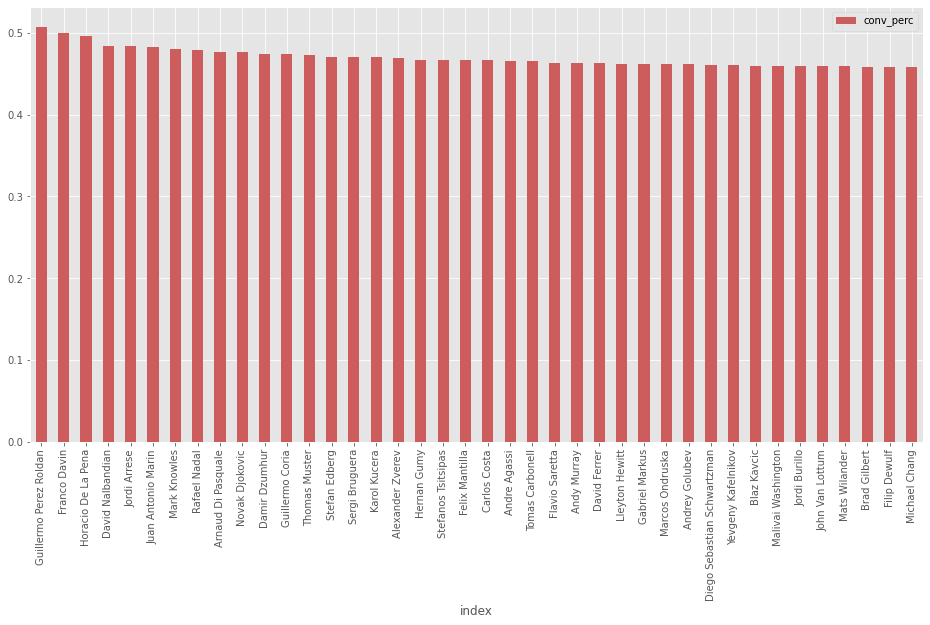

In [31]:
df_ratio.drop(0,inplace=True)
df_ratio.head(40).plot(x="index",y="conv_perc",kind="bar", figsize=(16,8), color="indianred")


À partir du graphique ci-dessus, pour les années 2000 et subséquentes et pour tout joueur ayant joué au moins 100 matchs, on voit que Nadal et Djokovic sont respectivement 2e et 3e. Federer est lui 31e en ce qui concerne cette statistique.

<AxesSubplot:xlabel='index'>

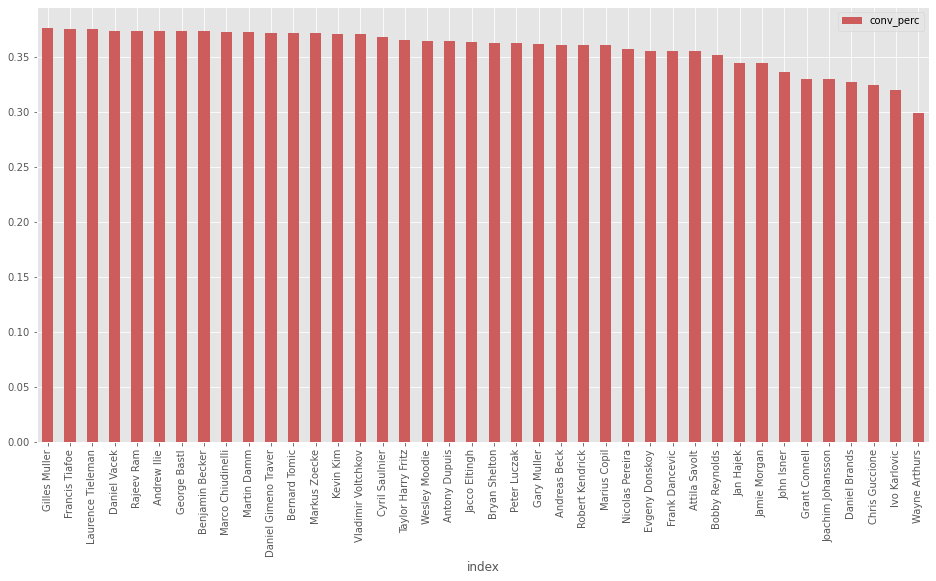

In [32]:
df_ratio.tail(40).plot(x="index",y="conv_perc",kind="bar", figsize=(16,8), color="indianred")

Le clasement ci-dessus représente plutôt les joueurs avec les pires ratio de conversion. Sans surprise, on y retrouve Ivo Karlovic et John Isner.

### Sauvetage des balles de bris

Examinons maintenant lequel des trois joueurs à le meilleur pourcentage quand vient le temps de sauver une balle de bris.

In [34]:
def bp_saved(df,player_name):
    df=df.copy(deep=True)
    df["bp_saved"]=0
    df["bp_saved"][df["winner_name"]==player_name]=df["w_bpSaved"]/df["w_bpFaced"]
    df["bp_saved"][df["loser_name"]==player_name]=df["l_bpSaved"]/df["l_bpFaced"]
    return df

df_fed=bp_saved(df_fed,"Roger Federer")
df_nadal=bp_saved(df_nadal,"Rafael Nadal")
df_djoko=bp_saved(df_djoko,"Novak Djokovic")


print("De la saison 2003 à 2019, Federer a sauvé", round(np.mean(df_fed["bp_saved"]),4)*100,"% de ses balles de bris")
print("De la saison 2005 à 2019, Nadal a sauvé", round(np.mean(df_nadal["bp_saved"]),4)*100,"% de ses balles de bris")
print("De la saison 2005 à 2019, Djokovic a sauvé", round(np.mean(df_djoko["bp_saved"]),2)*100,"% de ses balles de bris")


De la saison 2003 à 2019, Federer a sauvé 66.52 % de ses balles de bris
De la saison 2005 à 2019, Nadal a sauvé 64.67 % de ses balles de bris
De la saison 2005 à 2019, Djokovic a sauvé 64.0 % de ses balles de bris


Encore une fois, on constate que les trois joueurs sont très près l'un de l'autre pour cet aspect du jeux. Qu'en est-il si l'on compare chacune des saisons depuis 2003?

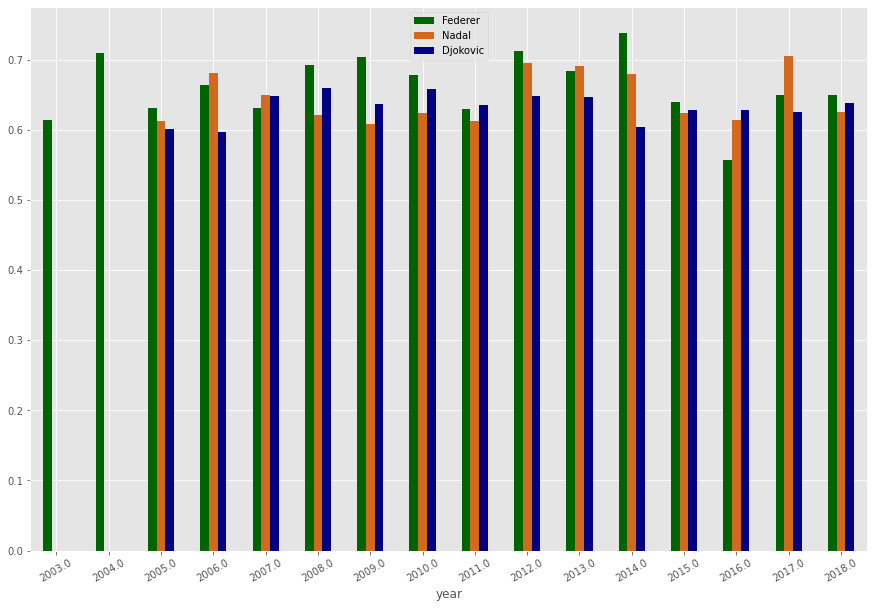

In [35]:
fed_bp=df_fed.groupby("year",as_index=False).agg({"bp_saved": np.mean})
nadal_bp=df_nadal.groupby("year",as_index=False).agg({"bp_saved": np.mean})
djoko_bp=df_djoko.groupby("year",as_index=False).agg({"bp_saved": np.mean})

x=[nadal_bp,djoko_bp]
df_bp=fed_bp
for i in x:
    df_bp=df_bp.merge(i,on="year",how="left")

df_bp=df_bp[df_bp["year"]!=2019]
df_bp.plot(kind = 'bar', color = ['darkgreen','chocolate','navy'], figsize = (15,10), x = 'year', rot = 30)
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

Comparons maintenant aux autres joueurs de l'ATP présents et passés.

In [36]:
df_2005["w_bpsaved"]=(df_2005["w_bpSaved"]/df_2005["w_bpFaced"])
df_2005["l_bpsaved"]=(df_2005["l_bpSaved"]/df_2005["l_bpFaced"])

player_dic={}
for i in df_2005["winner_name"].unique():
    indexes=df_2005[df_2005["winner_name"]==i].index
    dataframe=df_2005.iloc[indexes]
    avg1= np.mean(dataframe["w_bpsaved"])
    weigth_1=dataframe.shape[0]
    indexes=df_2005[df_2005["loser_name"]==i].index
    dataframe=df_2005.iloc[indexes]
    avg2= np.mean(dataframe["l_bpsaved"])
    weigth_2=dataframe.shape[0]
    ratio=weigth_1/(weigth_1+weigth_2)
    
    player_dic[i]=[(ratio*avg1 + (1-ratio)*avg2), weigth_1,weigth_2]
    
df_ratio=pd.DataFrame.from_dict(player_dic, orient='index')
df_ratio.rename(columns={0: "conv_perc", 1:"wins", 2:"loses"}, inplace=True)
df_ratio.sort_values(by="conv_perc",inplace=True,ascending=False)
df_ratio=df_ratio.dropna()
df_ratio=df_ratio[df_ratio["wins"]+df_ratio["loses"]>=100]
df_ratio.reset_index(inplace=True)

<AxesSubplot:xlabel='index'>

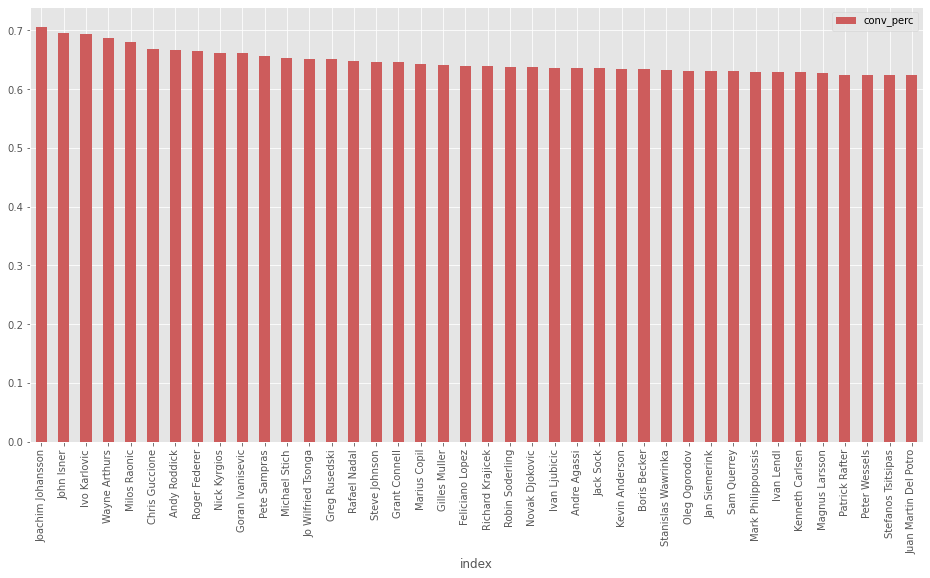

In [37]:
df_ratio.head(40).plot(x="index",y="conv_perc",kind="bar", figsize=(16,8), color="indianred")

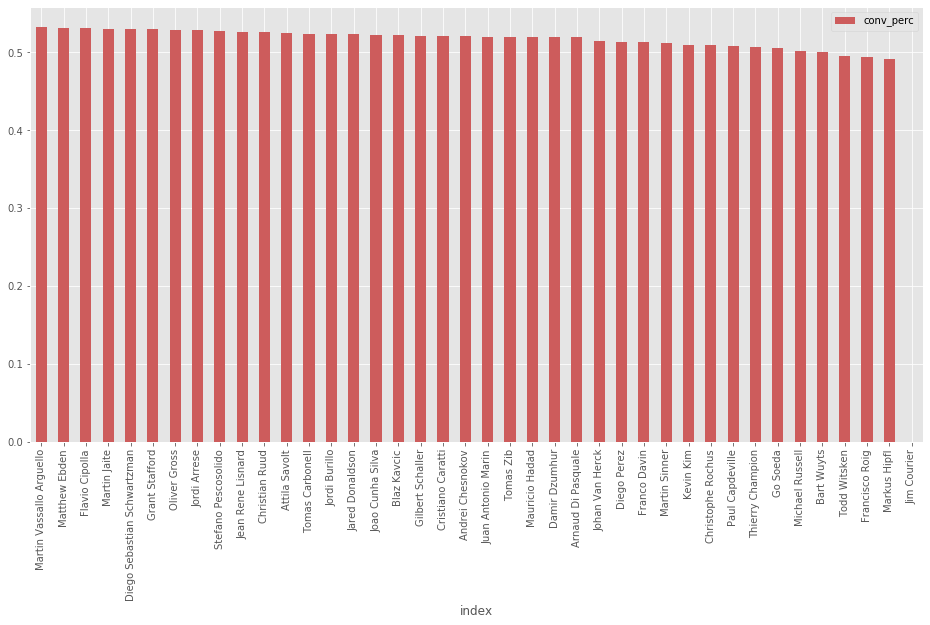

In [32]:
df_ratio.tail(40).plot(x="index",y="conv_perc",kind="bar", figsize=(16,8), color="indianred")

### Tie-break

Examinons maintenant qui entre Federer, Nadal et Djokvic a les meilleurs statistiques en bris d'égalité.

In [33]:
#Federer
df_fedtb = df_fed[df_fed["score"]!=" W/O"]
df_fedtb.reset_index(inplace=True, drop=True)
df_fedtb["score"]= df_fedtb["score"].apply(lambda x: x.split(" "))
df_fedtb["tb_win"]=0
df_fedtb["tb_lose"]=0

def tie_break(df,player_name):
    df=df.copy(deep=True)
    compteur_win=0
    compteur_lose=0
    for i in range(df.shape[0]):
        compteur_win=0
        compteur_lose=0
        if df["winner_name"][i]==player_name:
            for j in df["score"][i]:
                if j=="":
                    continue
                if (j[0]=="7" and j[2]=="6"):
                    compteur_win+=1
                if (j[0]=="6" and j[2]=="7"):
                    compteur_lose+=1                
        if df["loser_name"][i]==player_name:
            for j in df["score"][i]:
                if j=="":
                    continue
                if (j[2]=="7" and j[0]=="6"):
                    compteur_win+=1
                if (j[2]=="6" and j[0]=="7"):
                    compteur_lose+=1

        df["tb_win"][i]=compteur_win
        df["tb_lose"][i]=compteur_lose
        
    return df

df_fedtb=tie_break(df_fedtb,"Roger Federer")
    

tb_ratio=sum(df_fedtb["tb_win"])/(sum(df_fedtb["tb_win"])+sum(df_fedtb["tb_lose"]))
print("De l'année 2003 jusqu'à 2019, Federer a gagné",
      round((sum(df_fedtb["tb_win"])/(sum(df_fedtb["tb_win"])+sum(df_fedtb["tb_lose"])))*100,2),
      "% des tie-breaks qu'il a joué.")

De l'année 2003 jusqu'à 2019, Federer a gagné 67.09 % des tie-breaks qu'il a joué.


In [34]:
#Nadal
df_nadaltb=df_nadal
df_nadaltb.drop(df_nadal[(df_nadal["score"]==" W/O")|(df_nadal["score"]=="W/O")|(df_nadal["score"]=="RET")].index,inplace=True)
df_nadaltb.reset_index(inplace=True, drop=True)
df_nadaltb["score"]= df_nadaltb["score"].apply(lambda x: x.split(" "))
df_nadaltb["tb_win"]=0
df_nadaltb["tb_lose"]=0

df_nadaltb=tie_break(df_nadaltb,"Rafael Nadal")

print("De l'année 2005 jusqu'à 2019, Nadal a gagné",
      round((sum(df_nadaltb["tb_win"])/(sum(df_nadaltb["tb_win"])+sum(df_nadaltb["tb_lose"])))*100,2),
      "% des tie-breaks qu'il a joué.")


De l'année 2005 jusqu'à 2019, Nadal a gagné 62.29 % des tie-breaks qu'il a joué.


In [35]:
#Djokovic
df_djokotb=df_djoko
df_djokotb.drop(df_djoko[(df_djoko["score"]==" W/O")|(df_djoko["score"]=="W/O")|(df_djoko["score"]=="RET")].index,inplace=True)
df_djokotb.reset_index(inplace=True, drop=True)
df_djokotb["score"]= df_djokotb["score"].apply(lambda x: x.split(" "))
df_djokotb["tb_win"]=0
df_djokotb["tb_lose"]=0

df_djokotb=tie_break(df_djokotb,"Novak Djokovic")

print("De l'année 2005 jusqu'à 2019, Djokovic a gagné",
      round((sum(df_djokotb["tb_win"])/(sum(df_djokotb["tb_win"])+sum(df_djokotb["tb_lose"])))*100,2),
      "% des tie-breaks qu'il a joué.")


De l'année 2005 jusqu'à 2019, Djokovic a gagné 63.49 % des tie-breaks qu'il a joué.


On voit donc que Federer est celui qui remporte le plus souvent les bris d'égalité parmi les 3. Regardons maintenant ce qu'il en est par saison. 

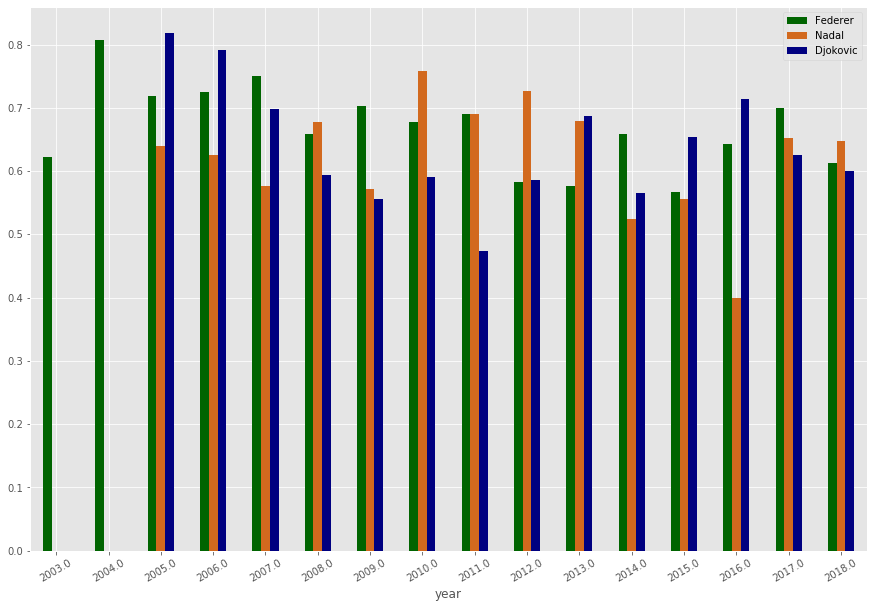

In [36]:
fed_tb=df_fedtb.groupby("year",as_index=False).agg({"tb_win": sum, "tb_lose": sum})
nadal_tb=df_nadaltb.groupby("year",as_index=False).agg({"tb_win": sum, "tb_lose": sum})
djoko_tb=df_djokotb.groupby("year",as_index=False).agg({"tb_win": sum, "tb_lose": sum})

#on crée une colonne pour le ratio
fed_tb["ratio"]=round(fed_tb["tb_win"]/(fed_tb["tb_win"]+fed_tb["tb_lose"]),4)
nadal_tb["ratio"]=round(nadal_tb["tb_win"]/(nadal_tb["tb_win"]+nadal_tb["tb_lose"]),4)
djoko_tb["ratio"]=round(djoko_tb["tb_win"]/(djoko_tb["tb_win"]+djoko_tb["tb_lose"]),4)

#on plot
x=[nadal_tb,djoko_tb]
df_tb=fed_tb
for i in x:
    df_tb=df_tb.merge(i,on="year",how="left")

df_tb=df_tb[df_tb["year"]!=2019]
df_tb[["year","ratio_x","ratio_y","ratio"]].plot(kind = 'bar', color = ['darkgreen','chocolate','navy'], figsize = (15,10), x = 'year', rot = 30)
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

Regardons maintenant comment les 3 joueurs se comparent aux autres joueurs de l'ATP concernant cet aspect.

In [37]:
tb_dic= {}
for i in df_2005["winner_name"].unique():
    indexes=df_2005[(df_2005["winner_name"]==i) | (df_2005["loser_name"]==i)].index
    dataframe=df_2005.iloc[indexes]
    dataframe.drop(dataframe[(dataframe["score"]==" W/O")|(dataframe["score"]=="W/O")|(dataframe["score"]=="RET") | (dataframe["score"].isnull())].index,inplace=True)
    dataframe.reset_index(inplace=True, drop=True)
    if dataframe.shape[0]>=50:
        dataframe["score"]= dataframe["score"].apply(lambda x: x.split(" "))
        dataframe["tb_win"]=0
        dataframe["tb_lose"]=0
        dataframe=tie_break(dataframe,i)
        tot_tb=sum(dataframe["tb_win"])+sum(dataframe["tb_lose"])
        if tot_tb>0:
            tb_dic[i]=[dataframe.shape[0],sum(dataframe["tb_win"])/tot_tb]
    else:
        continue
    
df_tbratio=pd.DataFrame.from_dict(tb_dic, orient='index')
df_tbratio.rename(columns={0: "matchesplayed",1:"tb_ratio"}, inplace=True)
df_tbratio.sort_values(by="tb_ratio",inplace=True,ascending=False)
df_tbratio.reset_index(inplace=True) 

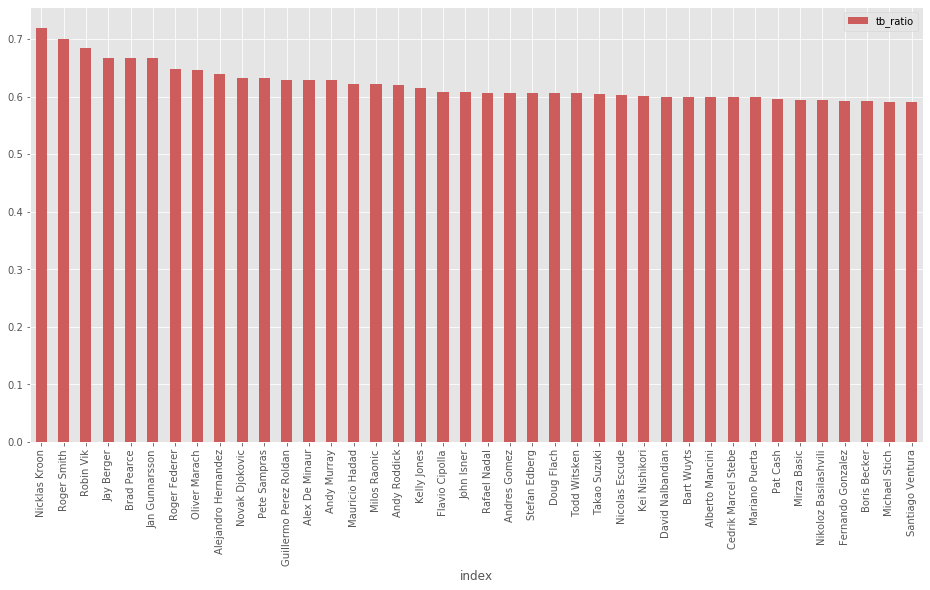

In [38]:
df_tbratio.head(40).plot(x="index",y="tb_ratio",kind="bar", figsize=(16,8), color="indianred")

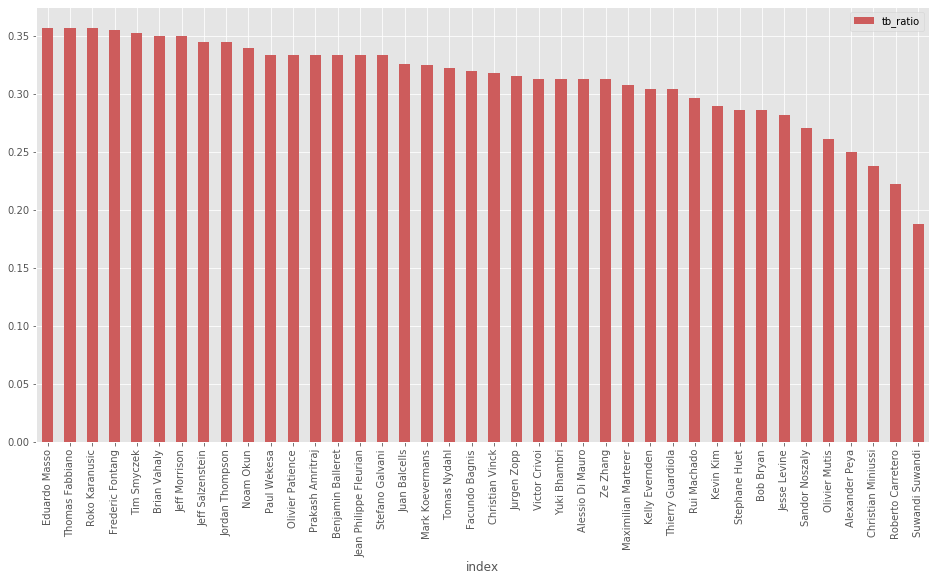

In [39]:
df_tbratio.tail(40).plot(x="index",y="tb_ratio",kind="bar", figsize=(16,8), color="indianred")


In [40]:
df_tbratio.head(30)

,index,matchesplayed,tb_ratio
0,Nicklas Kroon,58,0.720000
1,Roger Smith,60,0.700000
2,Robin Vik,58,0.684211
3,Jay Berger,55,0.666667
4,Brad Pearce,68,0.666667
5,Jan Gunnarsson,75,0.666667
6,Roger Federer,1449,0.648449
7,Oliver Marach,52,0.647059
8,Alejandro Hernandez,77,0.640000
9,Novak Djokovic,1022,0.633152


À partir de l'output ci-dessus, on constate assez facilement que Roger Federer est le meilleur au tie-break, suivi de près par Novak Djokovic. Rafael Nadal, tant qu'à lui, se retrouve un peu plus loin, derrière des joueurs notables comme Pete Sampras et Andy Murray.

### Face à face

Dans cette partie, le face à face entre Federer, Djokovic et Nadal sera analysé afin de déterminer les grandes tendances de victoire. Par la suite, pour chacun des joueurs, les rivalités les plus importantes seront analysées. 

#### Federer versus Nadal

In [41]:
df_fedal=df_fed[(df_fed["winner_name"]=="Rafael Nadal") | (df_fed["loser_name"]=="Rafael Nadal")]
df_fedal.reset_index(drop=True,inplace=True)
cols=["date","tourney_name","winner_name","score"]
df_fedal[cols]



,date,tourney_name,winner_name,score
0,2004-03-22,Miami Masters,Rafael Nadal,6-3 6-3
1,2005-03-21,Miami Masters,Roger Federer,2-6 6-7(4) 7-6(5) 6-3 6-1
2,2005-05-23,Roland Garros,Rafael Nadal,6-3 4-6 6-4 6-3
3,2006-02-27,Dubai,Rafael Nadal,2-6 6-4 6-4
4,2006-04-17,Monte Carlo Masters,Rafael Nadal,6-2 6-7(2) 6-3 7-6(5)
5,2006-05-08,Rome Masters,Rafael Nadal,6-7(0) 7-6(5) 6-4 2-6 7-6(5)
6,2006-05-29,Roland Garros,Rafael Nadal,1-6 6-1 6-4 7-6(4)
7,2006-06-26,Wimbledon,Roger Federer,6-0 7-6(5) 6-7(2) 6-3
8,2006-11-13,Masters Cup,Roger Federer,6-4 7-5
9,2007-04-15,Monte Carlo Masters,Rafael Nadal,6-4 6-4


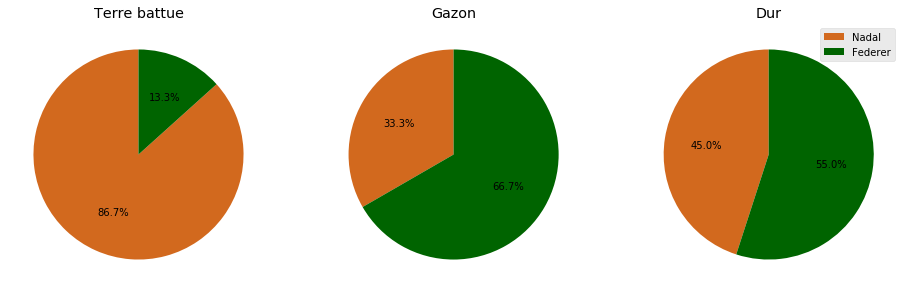

In [42]:
#Examinons le nombre de victoires de chacun en fonction de la surface
fedal=df_fedal.groupby(["surface","winner_name"],as_index=False).agg({"loser_name": "count"})

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Terre battue")
plt.pie([fedal["loser_name"][0], fedal["loser_name"][1]],autopct='%1.1f%%',startangle=90, colors=["chocolate","darkgreen"]) 


plt.subplot(1,3,2)
plt.pie([fedal["loser_name"][2], fedal["loser_name"][3]], autopct='%1.1f%%',startangle=90, colors=["chocolate","darkgreen"]) 
plt.title("Gazon")

plt.subplot(1,3,3)
plt.pie([fedal["loser_name"][4], fedal["loser_name"][5]], autopct='%1.1f%%',startangle=90, colors=["chocolate","darkgreen"])
plt.title("Dur")
plt.legend(["Nadal","Federer"],loc="best")

Sans surprise, on constate que Nadal a gagné la grande majorité des matchs sur terre battue. En revanche, Federer a remporté la majorité des matchs sur gazon. En ce qui concerne le face à face sur herbe, il est légèrement en faveur de Federer.

In [43]:
#Examinons le nombre de sets remportés en fonction de la surface

def sets_win(df,player_1,player_2):
    df=df.copy(deep=True)
    df["score"]=df["score"].apply(lambda x: x.split(" "))
    df["sets_p1"]=0
    df["sets_p2"]=0
    numbers=["0","1","2","3","4","5","6"]
    
    for i in range(df.shape[0]):
        compteur_p1=0
        compteur_p2=0
        sets_played=len(df["score"][i])
        if df["winner_name"][i]==player_1:
            for j in df["score"][i]:
                if j=="" or j=="W/O" or j=="RET":
                    continue
                if (j[0]=="6" or j[0]=="7") and j[2] in numbers:
                    compteur_p1+=1
                else:
                    compteur_p2+=1
            df["sets_p1"][i]=compteur_p1
            df["sets_p2"][i]=compteur_p2 
        
        if df["winner_name"][i]==player_2:
            for j in df["score"][i]:
                if j=="" or j=="W/O" or j=="RET":
                    continue
                if (j[0]=="6" or j[0]=="7") and j[2] in numbers:
                    compteur_p2+=1
                else:
                    compteur_p1+=1
            df["sets_p1"][i]=compteur_p1
            df["sets_p2"][i]=compteur_p2        
    return df                                

In [44]:
df_fedal=sets_win(df_fedal,"Roger Federer","Rafael Nadal")
fedal_sets=df_fedal.groupby("surface",as_index=False).agg({"sets_p1": sum, "sets_p2": sum})
fedal_sets

,surface,sets_p1,sets_p2
0,Clay,13,34
1,Grass,9,5
2,Hard,29,27


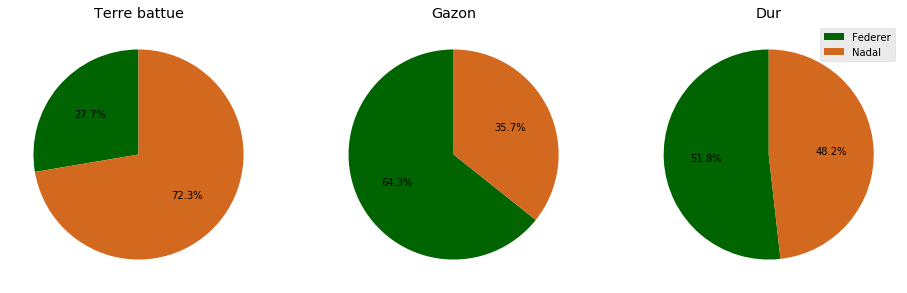

In [45]:
plt.figure(figsize=(16,8))
title=["Terre battue","Gazon","Dur"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.pie([fedal_sets["sets_p1"][i], fedal_sets["sets_p2"][i]],autopct='%1.1f%%',startangle=90, colors=["darkgreen","chocolate"]) 
    if i==2:
        plt.legend(["Federer","Nadal"],loc="best")

Encore une fois, on fait les mêmes conclusions que précédemment. Ainsi, Nadal a gagné la majorité des sets sur terre battue alors que Federer a remporté la majorité sur herbe.

In [46]:
df_fedal["fed_win"]=0
df_fedal["nadal_win"]=0
df_fedal["fed_win"][df_fedal["winner_name"]=="Roger Federer"]=1
df_fedal["nadal_win"][df_fedal["winner_name"]=="Rafael Nadal"]=1

fedal_evol=df_fedal.groupby("year",as_index=False).agg({"fed_win": sum, "nadal_win": sum})

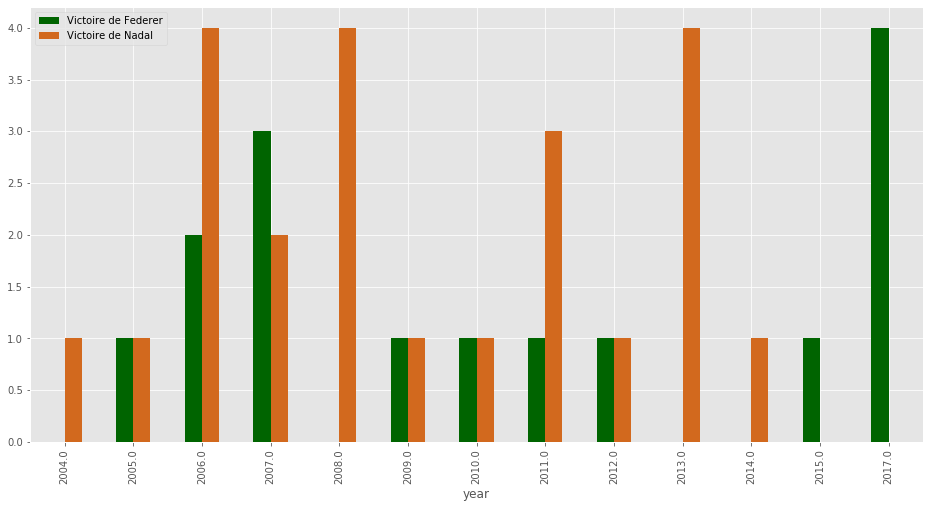

In [47]:
fedal_evol[["year","fed_win","nadal_win"]].plot(kind="bar",color=["darkgreen","chocolate"],figsize=(16,8),x="year")
plt.legend(["Victoire de Federer","Victoire de Nadal"])

#### Federer versus Djokovic

In [48]:
df_djokofed=df_fed[(df_fed["winner_name"]=="Novak Djokovic") | (df_fed["loser_name"]=="Novak Djokovic")]
df_djokofed.reset_index(drop=True,inplace=True)
cols=["date","tourney_name","winner_name","score"]
df_djokofed[cols]

,date,tourney_name,winner_name,score
0,2006-04-17,Monte Carlo Masters,Roger Federer,6-3 2-6 6-3
1,2006-09-22,Davis Cup WG PO: SUI vs SCG,Roger Federer,6-3 6-2 6-3
2,2007-01-15,Australian Open,Roger Federer,6-2 7-5 6-3
3,2007-02-26,Dubai,Roger Federer,6-3 6-7(6) 6-3
4,2007-08-05,Canada Masters,Novak Djokovic,7-6(2) 2-6 7-6(2)
5,2007-08-27,US Open,Roger Federer,7-6(4) 7-6(2) 6-4
6,2008-01-14,Australian Open,Novak Djokovic,7-5 6-3 7-6(5)
7,2008-04-20,Monte Carlo Masters,Roger Federer,6-3 3-2 RET
8,2008-08-25,US Open,Roger Federer,6-3 5-7 7-5 6-2
9,2009-03-25,Miami Masters,Novak Djokovic,3-6 6-2 6-3


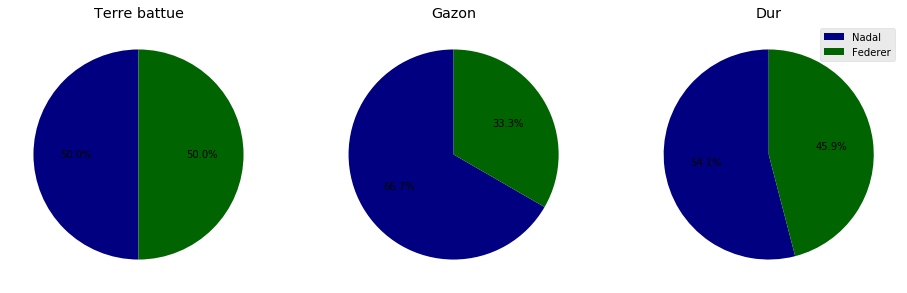

In [49]:
#Examinons le nombre de victoires de chacun en fonction de la surface
djokofed=df_djokofed.groupby(["surface","winner_name"],as_index=False).agg({"loser_name": "count"})

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Terre battue")
plt.pie([djokofed["loser_name"][0], djokofed["loser_name"][1]],autopct='%1.1f%%',startangle=90, colors=["navy","darkgreen"]) 


plt.subplot(1,3,2)
plt.pie([djokofed["loser_name"][2], djokofed["loser_name"][3]], autopct='%1.1f%%',startangle=90, colors=["navy","darkgreen"]) 
plt.title("Gazon")

plt.subplot(1,3,3)
plt.pie([djokofed["loser_name"][4], djokofed["loser_name"][5]], autopct='%1.1f%%',startangle=90, colors=["navy","darkgreen"])
plt.title("Dur")
plt.legend(["Nadal","Federer"],loc="best")

In [50]:
#Regardons maintenant le nombre de sets gagnés
df_djokofed = sets_win(df_djokofed,"Roger Federer","Novak Djokovic")
djokofed= df_djokofed.groupby("surface",as_index=False).agg({"sets_p1": sum, "sets_p2": sum})
djokofed

,surface,sets_p1,sets_p2
0,Clay,9,12
1,Grass,6,7
2,Hard,54,49


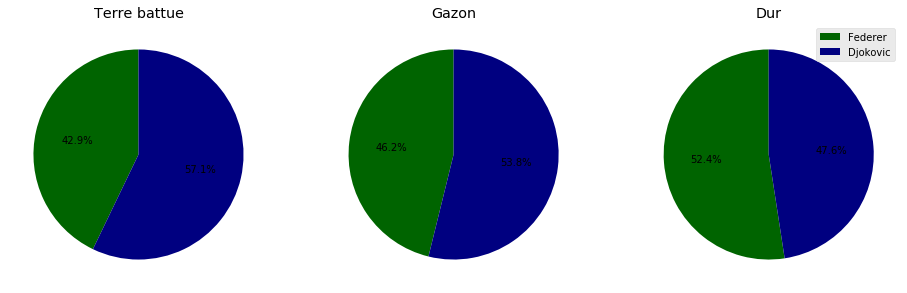

In [51]:
plt.figure(figsize=(16,8))
title=["Terre battue","Gazon","Dur"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.pie([djokofed["sets_p1"][i], djokofed["sets_p2"][i]],autopct='%1.1f%%',startangle=90, colors=["darkgreen","navy"]) 
    if i==2:
        plt.legend(["Federer","Djokovic"],loc="best")

À partir des graphiques ci-dessus, on constate que Djokovic a gagné la majorité des matchs sur terre gazon et sur le dur. Toutefois, les deux sont à égalité sur la terre battue.

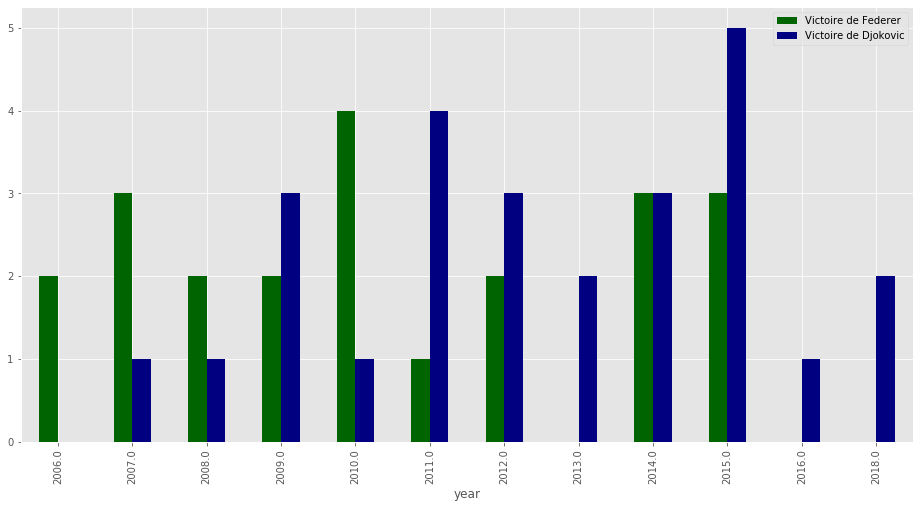

In [52]:
df_djokofed["fed_win"]=0
df_djokofed["djoko_win"]=0
df_djokofed["fed_win"][df_djokofed["winner_name"]=="Roger Federer"]=1
df_djokofed["djoko_win"][df_djokofed["winner_name"]=="Novak Djokovic"]=1

djokofed_evol=df_djokofed.groupby("year",as_index=False).agg({"fed_win": sum, "djoko_win": sum})

djokofed_evol[["year","fed_win","djoko_win"]].plot(kind="bar",color=["darkgreen","navy"],figsize=(16,8),x="year")
plt.legend(["Victoire de Federer","Victoire de Djokovic"])

#### Nadal versus Djokovic

In [53]:
df_djokodal= df_nadal[(df_nadal["winner_name"]=="Novak Djokovic") | (df_nadal["loser_name"]=="Novak Djokovic")]
df_djokodal.reset_index(inplace=True)
df_djokodal[cols]

,date,tourney_name,winner_name,score
0,2006-05-29,Roland Garros,Rafael Nadal,"[6-4, 6-4, RET]"
1,2007-03-05,Indian Wells Masters,Rafael Nadal,"[6-2, 7-5]"
2,2007-03-19,Miami Masters,Novak Djokovic,"[6-3, 6-4]"
3,2007-05-07,Rome Masters,Rafael Nadal,"[6-2, 6-3]"
4,2007-05-28,Roland Garros,Rafael Nadal,"[7-5, 6-4, 6-2]"
5,2007-06-25,Wimbledon,Rafael Nadal,"[3-6, 6-1, 4-1, RET]"
6,2007-08-05,Canada Masters,Novak Djokovic,"[7-5, 6-3]"
7,2007-11-12,Masters Cup,Rafael Nadal,"[6-4, 6-4]"
8,2008-03-13,Indian Wells Masters,Novak Djokovic,"[6-3, 6-2]"
9,2008-05-11,Hamburg Masters,Rafael Nadal,"[7-5, 2-6, 6-2]"


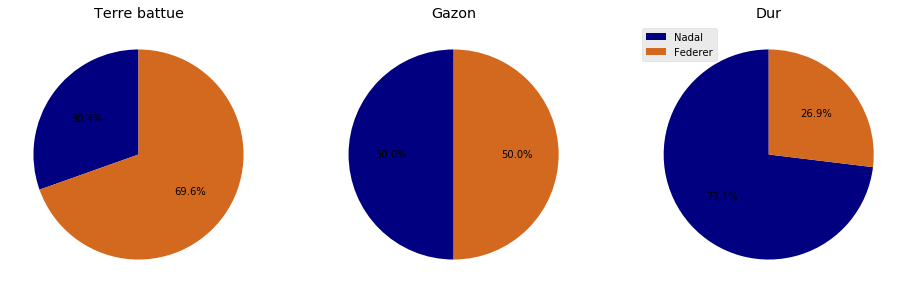

In [54]:
djokodal=df_djokodal.groupby(["surface","winner_name"],as_index=False).agg({"loser_name": "count"})

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Terre battue")
plt.pie([djokodal["loser_name"][0], djokodal["loser_name"][1]],autopct='%1.1f%%',startangle=90, colors=["navy","chocolate"]) 


plt.subplot(1,3,2)
plt.pie([djokodal["loser_name"][2], djokodal["loser_name"][3]], autopct='%1.1f%%',startangle=90, colors=["navy","chocolate"]) 
plt.title("Gazon")

plt.subplot(1,3,3)
plt.pie([djokodal["loser_name"][4], djokodal["loser_name"][5]], autopct='%1.1f%%',startangle=90, colors=["navy","chocolate"])
plt.title("Dur")
plt.legend(["Nadal","Federer"],loc="best")

In [55]:
def sets_win(df,player_1,player_2):
    df=df.copy(deep=True)
    df["sets_p1"]=0
    df["sets_p2"]=0
    numbers=["0","1","2","3","4","5","6"]
    
    for i in range(df.shape[0]):
        compteur_p1=0
        compteur_p2=0
        sets_played=len(df["score"][i])
        if df["winner_name"][i]==player_1:
            for j in df["score"][i]:
                if j=="" or j=="W/O" or j=="RET":
                    continue
                if (j[0]=="6" or j[0]=="7") and j[2] in numbers:
                    compteur_p1+=1
                else:
                    compteur_p2+=1
            df["sets_p1"][i]=compteur_p1
            df["sets_p2"][i]=compteur_p2 
        
        if df["winner_name"][i]==player_2:
            for j in df["score"][i]:
                if j=="" or j=="W/O" or j=="RET":
                    continue
                if (j[0]=="6" or j[0]=="7") and j[2] in numbers:
                    compteur_p2+=1
                else:
                    compteur_p1+=1
            df["sets_p1"][i]=compteur_p1
            df["sets_p2"][i]=compteur_p2        
    return df       

df_djokodal = sets_win(df_djokodal,"Rafael Nadal","Novak Djokovic")

djokodal= df_djokodal.groupby("surface",as_index=False).agg({"sets_p1": sum, "sets_p2": sum})
djokodal


,surface,sets_p1,sets_p2
0,Clay,38,23
1,Grass,7,7
2,Hard,21,45


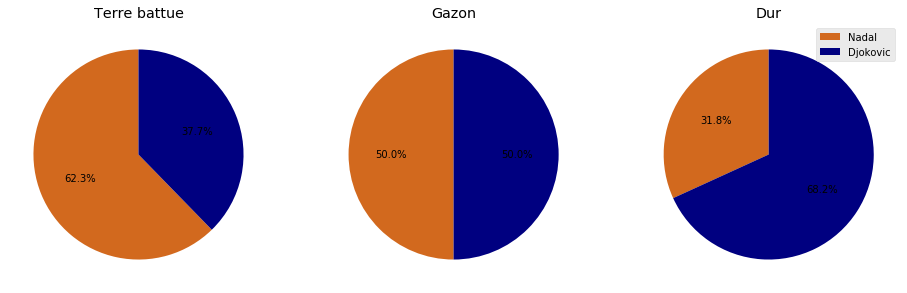

In [56]:
plt.figure(figsize=(16,8))
title=["Terre battue","Gazon","Dur"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.pie([djokodal["sets_p1"][i], djokodal["sets_p2"][i]],autopct='%1.1f%%',startangle=90, colors=["chocolate","navy"]) 
    if i==2:
        plt.legend(["Nadal","Djokovic"],loc="best")

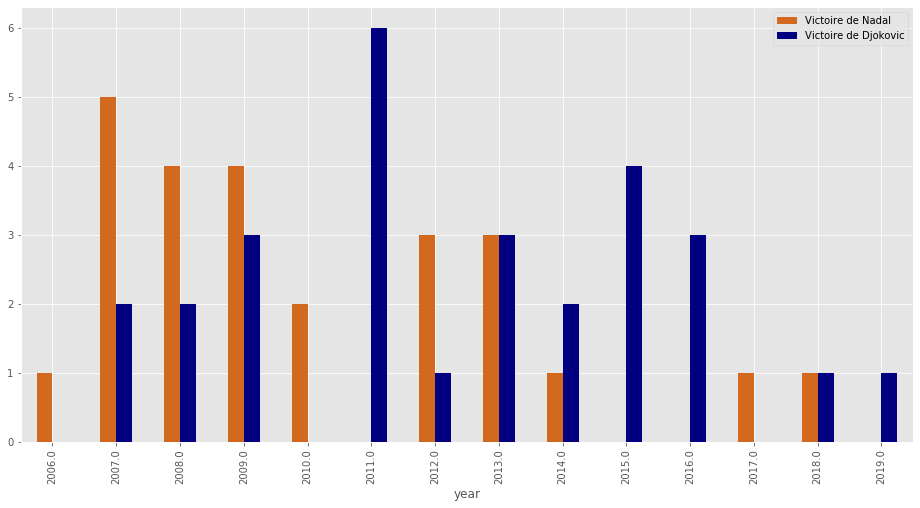

In [57]:
df_djokodal["nadal_win"]=0
df_djokodal["djoko_win"]=0
df_djokodal["djoko_win"][df_djokodal["winner_name"]=="Novak Djokovic"]=1
df_djokodal["nadal_win"][df_djokodal["winner_name"]=="Rafael Nadal"]=1

djokodal_evol=df_djokodal.groupby("year",as_index=False).agg({"nadal_win": sum, "djoko_win": sum})

djokodal_evol[["year","nadal_win","djoko_win"]].plot(kind="bar",color=["chocolate","navy"],figsize=(16,8),x="year")
plt.legend(["Victoire de Nadal","Victoire de Djokovic"])

On voit donc assez clairement que Djokovic a nettement l'avantage contre Nadal depuis 2011. Examimons maintenant si cela en excluant la terre battue.

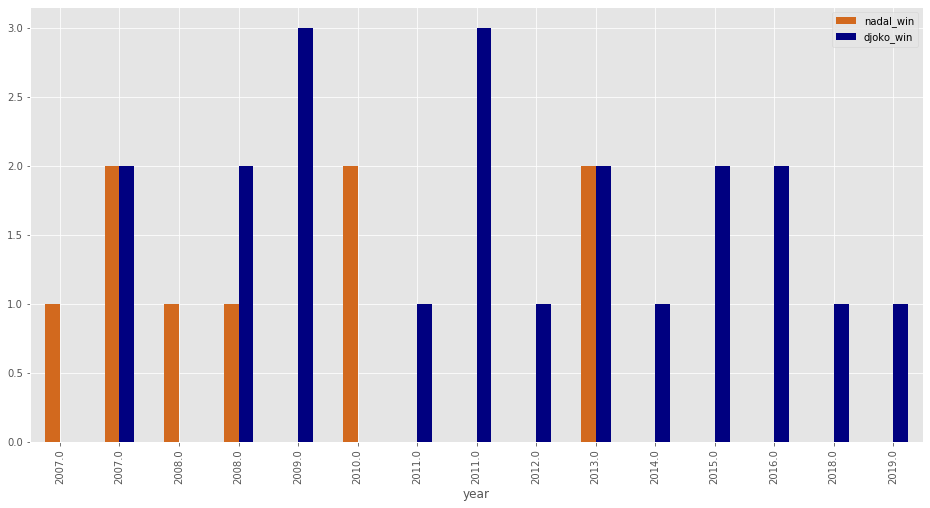

In [58]:
djokodal_evol=df_djokodal.groupby(["year","surface"],as_index=False).agg({"nadal_win": sum, "djoko_win": sum})
djokodal_evol[["year","nadal_win","djoko_win"]][djokodal_evol["surface"]!="Clay"].plot(kind="bar",x="year",
                                                                                       figsize=(16,8),color=["chocolate","navy"])

Encore pire, Nadal n'a pas battu Djokovic sur dur ou gazon depuis l'année 2013 !

À partir des comparaisons ci-dessus, on peut tirer quelques conclusions:

1) Federer a un face-à-face négatif contre Nadal et Djokovic. Cependant, contre Nadal, la fiche semble biaisée puisque la grande majorité des matchs à eu lieu sur terre battue. Si l'on considère les derniers matchs, Federer les a tous gagnés. Pour ce qui est de Djokovic, ce dernier a clairement un avantage depuis quelques rencontre celui-ci ayant remporté la majorité des derniers matchs. Il serait intéressant de regarder les statistiques de Federer lors des dernières rencontres. Ainsi, on pourrait déterminer si Djokovic a particulièrement bien joué lors de ces matchs ou si Federer était en deça de son niveau habituel.

2) Nadal a une fiche négative contre Djokovic. Il a remporté la grande majorité des victoires contre ce dernier sur terre battue, mais, depuis 2011, il affiche un taux de victoire très faible, surtout si l'on exclut la terre battue.

3) Djokovic a un face-à-face positif contre Federer et Nadal. Cependant, il a renversé la tendance il y a très peu de temps.

### Efficacité de la première et deuxième balle de service

Dans cette partie, l'efficacité de la première balle de servide (pourcentage, as, etc) ainsi que le pourcentage de points gagnés sur 2e balle seront analysés.

#### Première balle

In [59]:
#Regardons premièrement s'il manque des données

print(df_fed["w_1stIn"].isna().sum())
print(df_nadal["w_1stIn"].isna().sum())
print(df_djoko["w_1stIn"].isna().sum())

49
20
36


On constate qu'il manque des valeurs dans chacun des datasets. Nous allons donc éliminer les observations manquantes.

In [60]:
df_fed["fserve_perc"]=0
df_fed["fserve_perc"][df_fed["winner_name"]=="Roger Federer"]=df_fed["w_1stIn"]
df_fed["fserve_perc"][df_fed["loser_name"]=="Roger Federer"]=df_fed["l_1stIn"]
df_fedfs=df_fed.dropna(subset=["w_1stIn","l_1stIn"])
df_fedfs.reset_index(inplace=True)

df_nadal["fserve_perc"]=0
df_nadal["fserve_perc"][df_nadal["winner_name"]=="Rafael Nadal"]=df_nadal["w_1stIn"]
df_nadal["fserve_perc"][df_nadal["loser_name"]=="Rafael Nadal"]=df_nadal["l_1stIn"]
df_nadalfs=df_nadal.dropna(subset=["w_1stIn","l_1stIn"])
df_nadalfs.reset_index(inplace=True)


df_djoko["fserve_perc"]=0
df_djoko["fserve_perc"][df_djoko["winner_name"]=="Novak Djokovic"]=df_djoko["w_1stIn"]
df_djoko["fserve_perc"][df_djoko["loser_name"]=="Novak Djokovic"]=df_djoko["l_1stIn"]
df_djokofs=df_djoko.dropna(subset=["w_1stIn","l_1stIn"])
df_djokofs.reset_index(inplace=True)

print("En moyenne de 2003 à 2019, la moyenne de pourcentage de première balle est de",
      np.round(np.mean(df_fed["fserve_perc"]),2),"% pour Federer")

print("En moyenne de 2005 à 2019, la moyenne de pourcentage de première balle est de",
      np.round(np.mean(df_nadal["fserve_perc"]),2),"% pour Nadal")

print("En moyenne de 2005 à 2019, la moyenne de pourcentage de première balle est de",
      np.round(np.mean(df_djoko["fserve_perc"]),2),"% pour Djokovic")



En moyenne de 2003 à 2019, la moyenne de pourcentage de première balle est de 48.13 % pour Federer
En moyenne de 2005 à 2019, la moyenne de pourcentage de première balle est de 49.92 % pour Nadal
En moyenne de 2005 à 2019, la moyenne de pourcentage de première balle est de 50.14 % pour Djokovic


Ainsi, Djokovic semble avoir le plus haut pourcentage de premier service en jeux avec près de 50%. Federer a tant qu'à lui le pourcentage le plus bas. Cependant, cela est très peu parlant si l'on ne sait pas si les joueurs ont gagné le point ou non. Regardons avant tout cette statistique en fonction de la saison. 

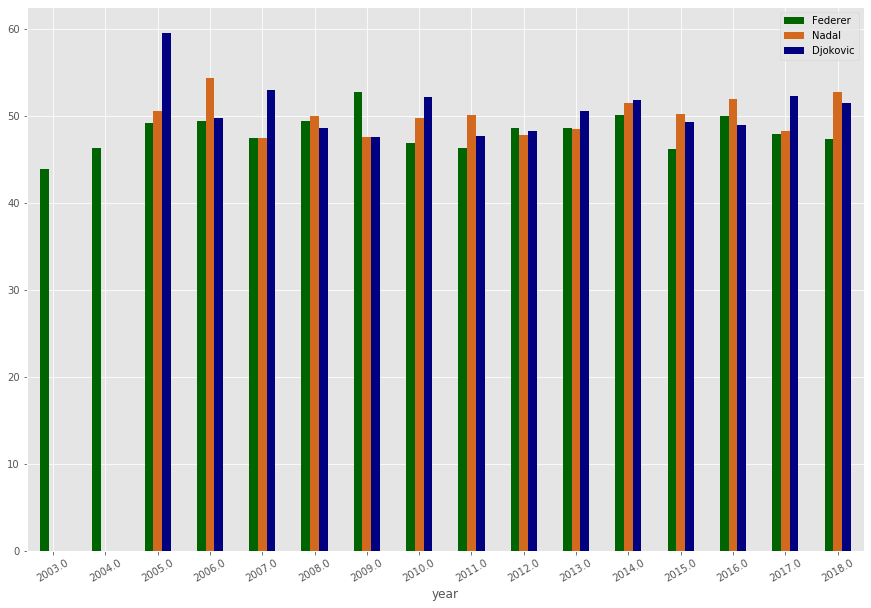

In [61]:
fed_percfs=df_fedfs.groupby("year",as_index=False).agg({"fserve_perc":np.mean})
nadal_percfs=df_nadalfs.groupby("year",as_index=False).agg({"fserve_perc":np.mean})
djoko_percfs=df_djokofs.groupby("year",as_index=False).agg({"fserve_perc":np.mean})

x=[nadal_percfs, djoko_percfs]

for i in x:
    fed_percfs=fed_percfs.merge(i,on="year",how="left")

fed_percfs=fed_percfs[fed_percfs["year"]!=2019]
fed_percfs.plot(kind = 'bar', color = ['darkgreen','chocolate','navy'], figsize = (15,10), x = 'year', rot = 30)
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

Donc oui, Federer a un pourcentage de service plus bas que ces deux rivaux. Cependant, est-il possible qu'il prenne également plus de risque sur sa première balle? Analysons le pourcentage de points gagnés sur première balle.

In [62]:
df_fedfs["fs_won"]=0
df_fedfs["fs_won"][df_fedfs["winner_name"]=="Roger Federer"]=(df_fedfs["w_1stWon"]/df_fedfs["fserve_perc"])
df_fedfs["fs_won"][df_fedfs["loser_name"]=="Roger Federer"]=(df_fedfs["l_1stWon"]/df_fedfs["fserve_perc"])

df_nadalfs["fs_won"]=0
df_nadalfs["fs_won"][df_nadalfs["winner_name"]=="Rafael Nadal"]=(df_nadalfs["w_1stWon"]/df_nadalfs["fserve_perc"])
df_nadalfs["fs_won"][df_nadalfs["loser_name"]=="Rafael Nadal"]=(df_nadalfs["l_1stWon"]/df_nadalfs["fserve_perc"])

df_djokofs["fs_won"]=0
df_djokofs["fs_won"][df_djokofs["winner_name"]=="Novak Djokovic"]=(df_djokofs["w_1stWon"]/df_djokofs["fserve_perc"])
df_djokofs["fs_won"][df_djokofs["loser_name"]=="Novak Djokovic"]=(df_djokofs["l_1stWon"]/df_djokofs["fserve_perc"])


print("En moyenne de 2003 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de",
      np.round(np.mean(df_fedfs["fs_won"]),2)*100,"% pour Federer")

print("En moyenne de 2005 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de",
      np.round(np.mean(df_nadalfs["fs_won"])*100,2),"% pour Nadal")

print("En moyenne de 2005 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de",
      np.round(np.mean(df_djokofs["fs_won"])*100,2),"% pour Djokovic")

En moyenne de 2003 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de 79.0 % pour Federer
En moyenne de 2005 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de 73.26 % pour Nadal
En moyenne de 2005 à 2019, la moyenne de pourcentage de points gagnés sur première balle est de 74.36 % pour Djokovic


Ainsi, à partir de l'output ci-dessus, on constate que Federer gagne davantage de points sur sa première balle que ses deux rivaux. Examinons maintenant ce qu'il en est par saison.

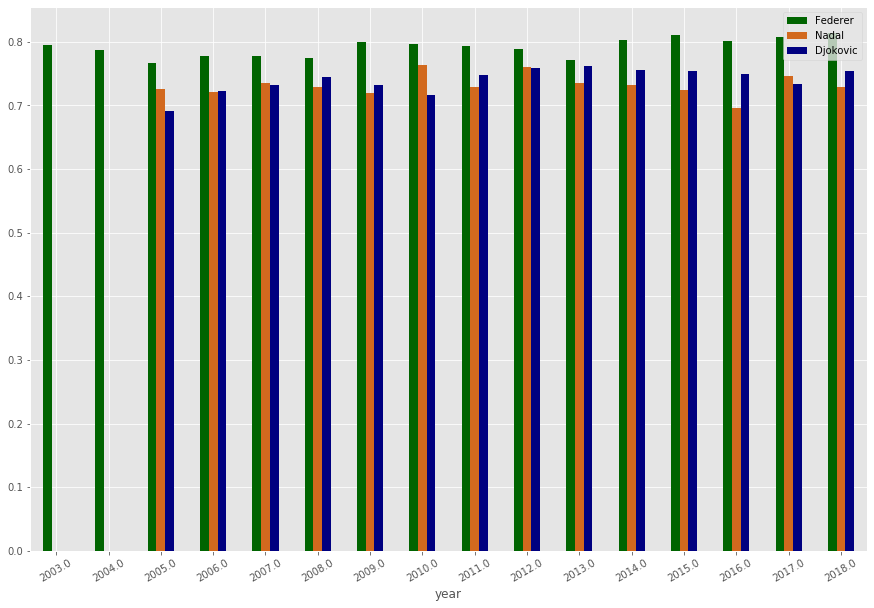

In [63]:
fed_percfs=df_fedfs.groupby("year",as_index=False).agg({"fs_won":np.mean})
nadal_percfs=df_nadalfs.groupby("year",as_index=False).agg({"fs_won":np.mean})
djoko_percfs=df_djokofs.groupby("year",as_index=False).agg({"fs_won":np.mean})

x=[nadal_percfs, djoko_percfs]

for i in x:
    fed_percfs=fed_percfs.merge(i,on="year",how="left")

fed_percfs=fed_percfs[fed_percfs["year"]!=2019]
fed_percfs.plot(kind = 'bar', color = ['darkgreen','chocolate','navy'], figsize = (15,10), x = 'year', rot = 30)
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

Via le graphique ci-dessus, on voit donc que Federer est nettement supérieur dans cet aspect du jeux. À chacune des saisons, son pourcentage de points gagnés sur première balle est nettement supérieur à celui de Djokovic et Nadal. Regardons maintenant les as par partie des trois hommes. 

In [64]:
df_fed["fed_ace"]=0
df_fed["fed_ace"][df_fed["winner_name"]=="Roger Federer"]=df_fed["w_ace"]
df_fed["fed_ace"][df_fed["loser_name"]=="Roger Federer"]=df_fed["l_ace"]
df_fedace=df_fed.dropna(subset=["fed_ace"])
df_fedace.reset_index(inplace=True)

df_nadal["nadal_ace"]=0
df_nadal["nadal_ace"][df_nadal["winner_name"]=="Rafael Nadal"]=df_nadal["w_ace"]
df_nadal["nadal_ace"][df_nadal["loser_name"]=="Rafael Nadal"]=df_nadal["l_ace"]
df_nadalace=df_nadal.dropna(subset=["nadal_ace"])
df_nadalace.reset_index(inplace=True)

df_djoko["djoko_ace"]=0
df_djoko["djoko_ace"][df_djoko["winner_name"]=="Novak Djokovic"]=df_djoko["w_ace"]
df_djoko["djoko_ace"][df_djoko["loser_name"]=="Novak Djokovic"]=df_djoko["l_ace"]
df_djokoace=df_djoko.dropna(subset=["djoko_ace"])
df_djokoace.reset_index(inplace=True)

print("Depuis la saison 2003, Federer a réussi",sum(df_fedace["fed_ace"]),"as")
print("Depuis la saison 2005, Nadal a réussi",sum(df_nadalace["nadal_ace"]),"as")
print("Depuis la saison 2005, Djokovic a réussi",sum(df_djokoace["djoko_ace"]),"as")


Depuis la saison 2003, Federer a réussi 9288.0 as
Depuis la saison 2005, Nadal a réussi 3136.0 as
Depuis la saison 2005, Djokovic a réussi 5284.0 as


Examinons maintenant le nombre total d'as par saison.

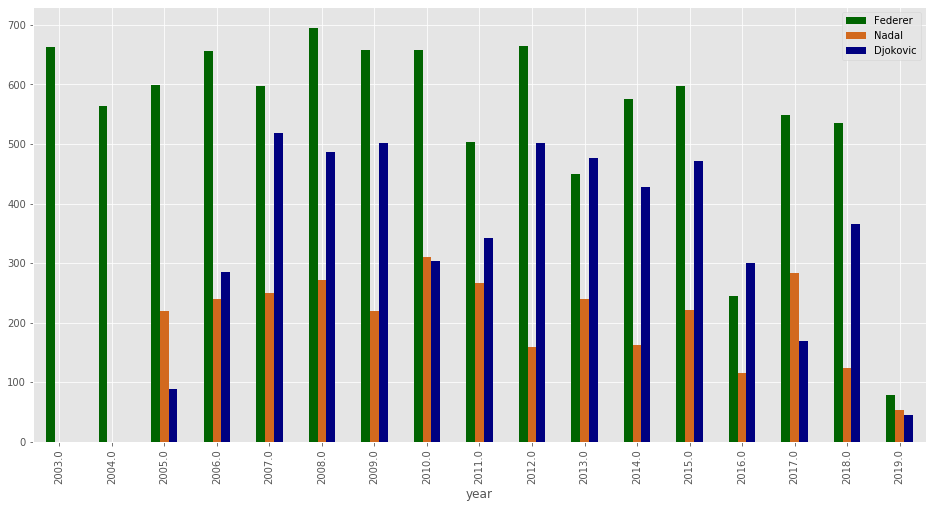

In [65]:
fed_ace=df_fedace.groupby("year",as_index=False).agg({"fed_ace":sum})
nadal_ace=df_nadalace.groupby("year",as_index=False).agg({"nadal_ace":sum})
djoko_ace=df_djokoace.groupby("year",as_index=False).agg({"djoko_ace":sum})

x=[nadal_ace, djoko_ace]

for i in x:
    fed_ace=fed_ace.merge(i,on="year",how="left")
    
fed_ace.plot(kind="bar",x="year",figsize=(16,8),color = ['darkgreen','chocolate','navy'])
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

On voit assez clairement que Federer est supérieur dans cet aspect du jeux. La seul saison où un joueur a plus d'as est en 2013 alors que Djokovic l'a légèrement dépassé. Bien entendu, cette métrique peut être biaisée tout dépendant le nombre de matchs joués par les joueurs. Examinons donc la moyenne d'as par match. 

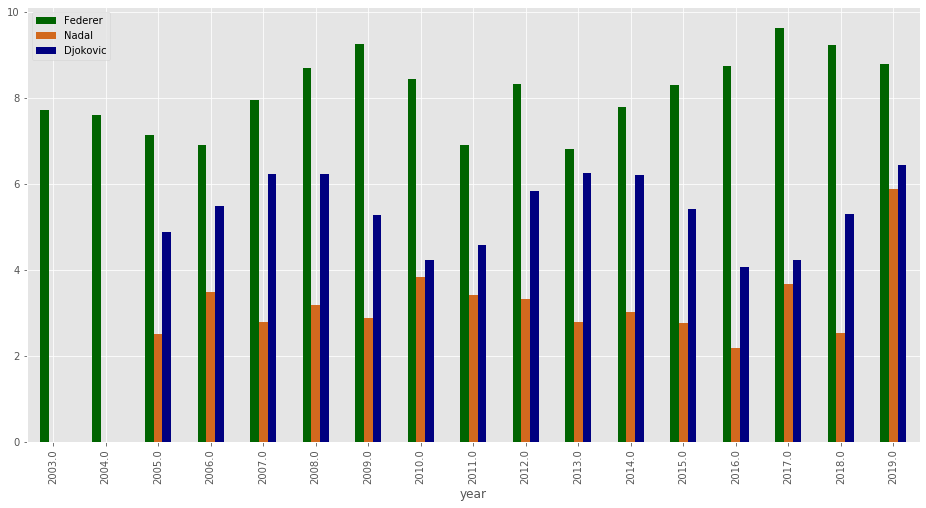

In [66]:
fed_ace=df_fedace.groupby("year",as_index=False).agg({"fed_ace":np.mean})
nadal_ace=df_nadalace.groupby("year",as_index=False).agg({"nadal_ace":np.mean})
djoko_ace=df_djokoace.groupby("year",as_index=False).agg({"djoko_ace":np.mean})

x=[nadal_ace, djoko_ace]

for i in x:
    fed_ace=fed_ace.merge(i,on="year",how="left")
    
fed_ace.plot(kind="bar",x="year",figsize=(16,8),color = ['darkgreen','chocolate','navy'])
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

Ainsi, même en considérant la moyenne d'as par match, Federer reste au-dessus.

### Nombre de finales remportées

In [114]:
def final_function(df):
    df=df.copy(deep=True)
    a=df[df["round"]=="F"]
    a.reset_index(inplace=True,drop=True)
    return a

df_fedfinal=final_function(df_fed)
df_nadalfinal=final_function(df_nadal)
df_djokofinal=final_function(df_djoko)

fed_final=df_fedfinal.groupby(["year"],as_index=False).agg({"win":sum})
nadal_final=df_nadalfinal.groupby(["year"],as_index=False).agg({"win":sum})
djoko_final=df_djokofinal.groupby(["year"],as_index=False).agg({"win":sum})

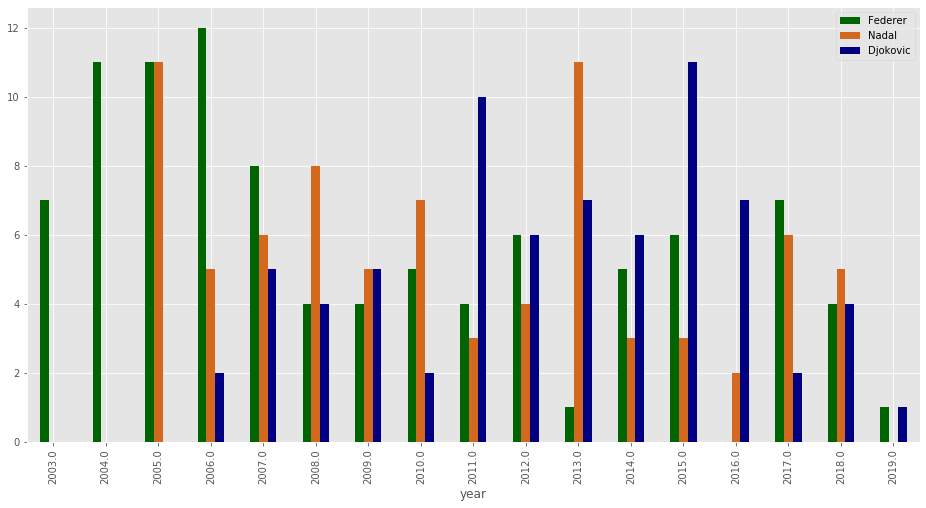

In [116]:
x=[nadal_final, djoko_final]

for i in x:
    fed_final=fed_final.merge(i,on="year",how="left")
    
fed_final.plot(kind="bar",x="year",figsize=(16,8),color = ['darkgreen','chocolate','navy'])
plt.legend(loc="best",labels=["Federer","Nadal","Djokovic"])

In [67]:
#Idées: GC / Tournois gagnés par année
#Est-ce que Murray devrait faire partie du Big 3?
#Performance au 5e set d'un grand chelem
#durée de la partie
#Pourcentage des finales jouées gagnées
#Nextgen versus big Four (début de carrière)